In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
train = pd.read_csv('train.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589918 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64

In [11]:
train.select_dtypes(include=['object']) 
# Категориальные колонки 

,client_id,npo_account_id,quarter,frst_pmnt_date,lst_pmnt_date_per_qrtr,region
0,0xA095932790098744A2325A8D152C05C7,0xD4DBBAC6561929409BA45725A220613E,2017Q4,1999-07-02,NaN,САМАРСКАЯ ОБЛ
1,0xF75BAA20A603A2479005DEB80464336E,0x3DCFF11974B3D8458CE3569DE9E855D5,2009Q1,2004-12-31,2009-03-11,ЛИПЕЦКАЯ ОБЛ
2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,2010Q1,2007-02-20,2010-03-17,ОРЛОВСКАЯ ОБЛ
3,0x0AD72BC5475D9A4D83E12350A84F839D,0xF59C4E62F115684899EAE9B5D5ECF70F,2005Q4,2005-12-29,2005-12-29,СВЕРДЛОВСКАЯ ОБЛ
4,0x73DF06339CC25840838408BAD52BE223,0x35BFFA05321C014B9FC29A189E89EDF0,2007Q4,2005-08-08,2007-12-09,ЛИПЕЦКАЯ ОБЛ
...,...,...,...,...,...,...
3589913,0x12428DF10AD2FA4C87D58BCB129F8229,0xD4B2B35E64A82A4D8F31BB7F59FC38C7,2012Q2,2005-12-31,2012-05-08,ВОЛОГОДСКАЯ ОБЛ
3589914,0xEAB12A86D0D0BD4DAAF3BFA200C0984B,0x0097B39ACA692B47901EE986CA14D5E8,2018Q4,2015-09-14,2018-12-13,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО
3589915,0xD080C4231A7BB04D821375C279B85B1E,0x94E87C78A97EBC478F4C7CC5F908C756,2016Q4,2015-09-14,2016-12-13,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО
3589916,0xF7C3ABC2295CC140A3B7EA53CB9B39DF,0xBB31CAEA5AF97C418942F2B68341D992,1999Q1,1997-07-29,NaN,КАЛУЖСКАЯ ОБЛ


In [13]:
train.columns[train.isnull().any()] 
# Всего 4 колонки содержат Null, глянем их 

Index(['frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'postal_code', 'region'], dtype='object')

In [17]:
train[['frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'postal_code', 'region']]
# Дата первого взноса 
# Дата последнего взноса в квартале 
# Почтовый индекс, указанный при заключении договора
# Регион, указанный при заключении договора

,frst_pmnt_date,lst_pmnt_date_per_qrtr,postal_code,region
0,1999-07-02,NaN,446254.0,САМАРСКАЯ ОБЛ
1,2004-12-31,2009-03-11,399841.0,ЛИПЕЦКАЯ ОБЛ
2,2007-02-20,2010-03-17,302038.0,ОРЛОВСКАЯ ОБЛ
3,2005-12-29,2005-12-29,620034.0,СВЕРДЛОВСКАЯ ОБЛ
4,2005-08-08,2007-12-09,398035.0,ЛИПЕЦКАЯ ОБЛ
...,...,...,...,...
3589913,2005-12-31,2012-05-08,162690.0,ВОЛОГОДСКАЯ ОБЛ
3589914,2015-09-14,2018-12-13,628303.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО
3589915,2015-09-14,2016-12-13,628401.0,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО
3589916,1997-07-29,NaN,249130.0,КАЛУЖСКАЯ ОБЛ


In [19]:
# Глянем а сколько процентов данных в каких колонках отсутствует 
train[['frst_pmnt_date', 'lst_pmnt_date_per_qrtr', 'postal_code', 'region']].isnull().mean() * 100

frst_pmnt_date             0.903670
lst_pmnt_date_per_qrtr    32.212713
postal_code                2.789952
region                     3.664986
dtype: float64

In [20]:
# Как будто lst_pmnt_date_per_qrtr проще удалить 

In [23]:
train['region'].nunique()
# А должно быть 89... 

448

In [25]:
train['year'].unique() # все норм 

array([2017, 2009, 2010, 2005, 2007, 2004, 2020, 2021, 2018, 2019, 2012,
       1994, 2011, 2016, 2013, 2006, 1999, 2022, 2015, 2008, 2001, 2014,
       2002, 2000, 1997, 2003, 1998, 1993, 1996, 1995, 2023], dtype=int64)

In [29]:
train['quarter'].unique() # все норм 

array(['2017Q4', '2009Q1', '2010Q1', '2005Q4', '2007Q4', '2007Q3',
       '2004Q4', '2020Q4', '2021Q1', '2018Q4', '2019Q4', '2009Q3',
       '2012Q4', '2019Q1', '1994Q4', '2011Q4', '2016Q4', '2013Q4',
       '2021Q2', '2006Q4', '1999Q2', '2022Q3', '2012Q1', '2004Q1',
       '2013Q3', '2015Q4', '2020Q2', '2010Q2', '2013Q1', '2015Q2',
       '2006Q1', '2022Q4', '2008Q3', '2016Q1', '2001Q4', '2014Q3',
       '2010Q4', '2002Q4', '2015Q3', '2015Q1', '2021Q4', '2000Q4',
       '2016Q3', '2018Q2', '2002Q3', '2017Q3', '2008Q4', '2017Q1',
       '2005Q2', '2019Q3', '2014Q1', '1997Q3', '2022Q1', '2003Q2',
       '2017Q2', '2014Q4', '2018Q3', '2011Q2', '2013Q2', '2007Q1',
       '2000Q2', '2020Q3', '2021Q3', '2014Q2', '2018Q1', '1994Q2',
       '2008Q2', '2019Q2', '2016Q2', '2022Q2', '2020Q1', '2006Q3',
       '2002Q2', '2011Q1', '1998Q1', '2010Q3', '2003Q1', '2001Q3',
       '1997Q4', '2009Q4', '1999Q1', '2005Q1', '2012Q2', '2011Q3',
       '2009Q2', '2007Q2', '2012Q3', '2008Q1', '2001Q1', '2000

In [33]:
train['gender'].unique() # норм, эльфов нет 

array([ 1, -1], dtype=int64)

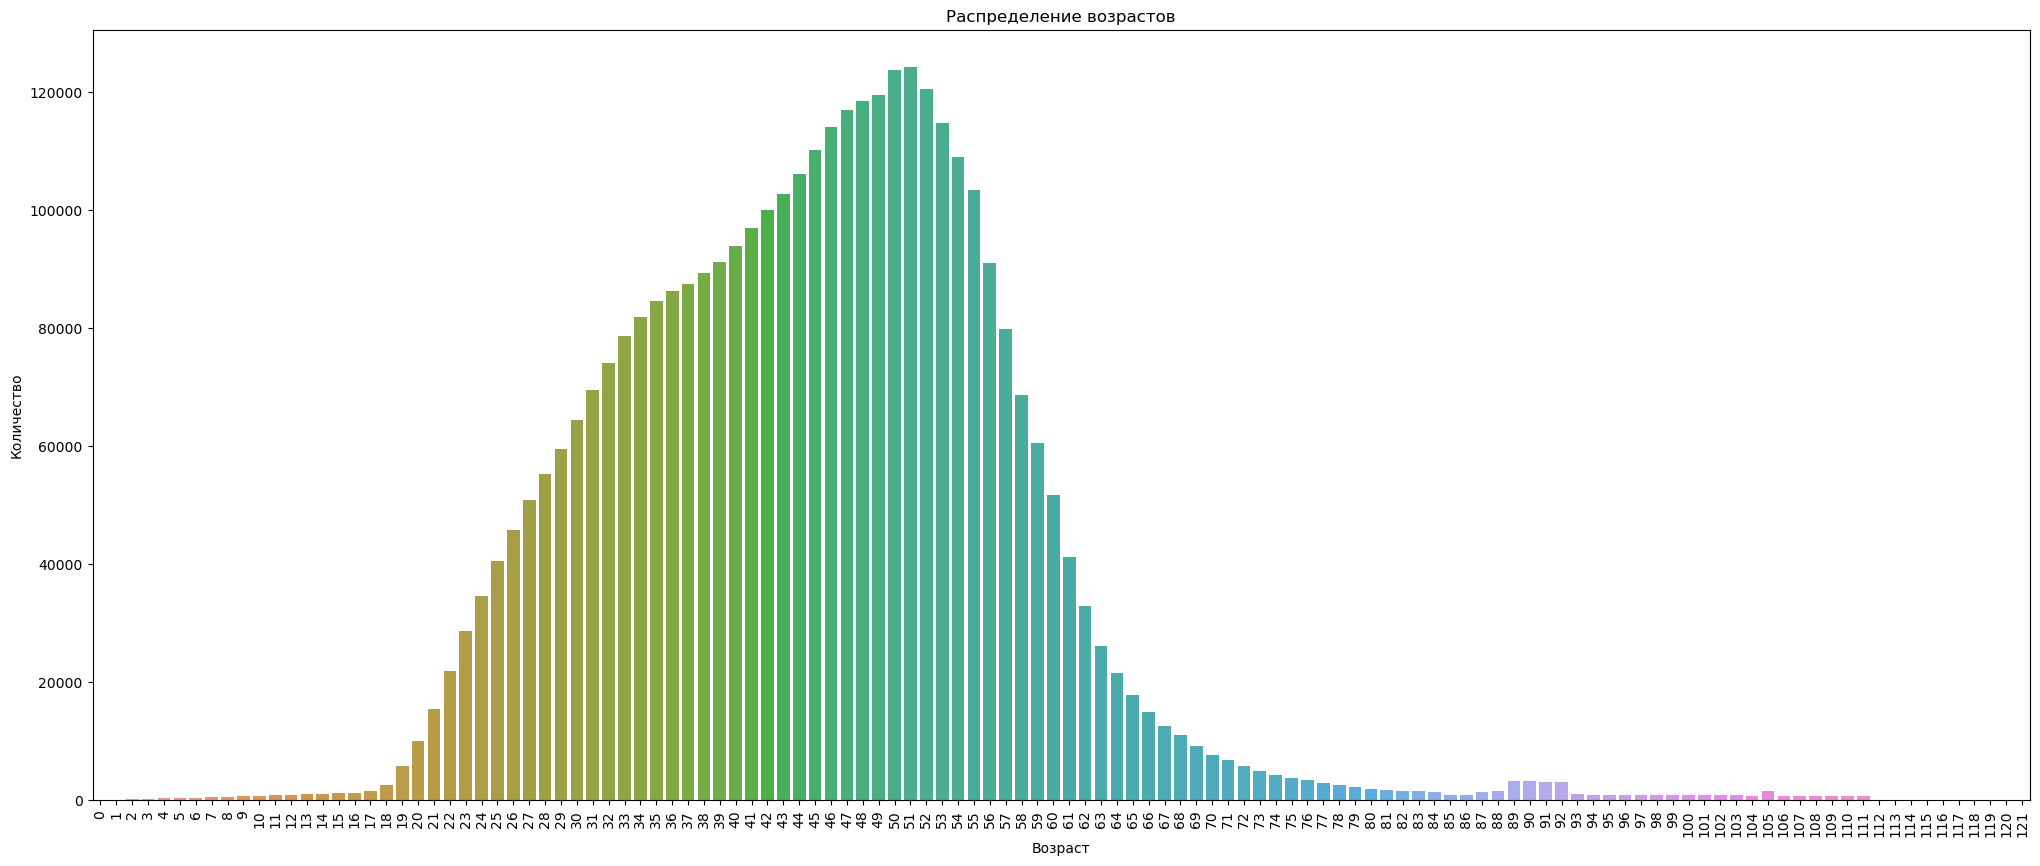

In [46]:
plt.figure(figsize=(25, 10))
sns.countplot(x='age', data=train)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation=90)  
plt.show()
# Были замечены очень молодые клиенты, 3-4 года?? 
# К тому же клиенты возрастом 0 лет? 

In [57]:
# Исправим колонку с регионами : 

In [72]:
regions = train['region'].sort_values()

In [74]:
regions.nunique()

448

In [75]:
train.columns

Index(['slctn_nmbr', 'client_id', 'npo_account_id', 'npo_accnts_nmbr',
       'pmnts_type', 'year', 'quarter', 'gender', 'age', 'clnt_cprtn_time_d',
       'actv_prd_d', 'lst_pmnt_rcnc_d', 'balance', 'oprtn_sum_per_qrtr',
       'oprtn_sum_per_year', 'frst_pmnt_date', 'lst_pmnt_date_per_qrtr',
       'frst_pmnt', 'lst_pmnt', 'pmnts_sum', 'pmnts_nmbr',
       'pmnts_sum_per_qrtr', 'pmnts_sum_per_year', 'pmnts_nmbr_per_qrtr',
       'pmnts_nmbr_per_year', 'incm_sum', 'incm_per_qrtr', 'incm_per_year',
       'mgd_accum_period', 'mgd_payment_period', 'phone_number', 'email', 'lk',
       'assignee_npo', 'assignee_ops', 'postal_code', 'region', 'citizen',
       'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt', 'churn'],
      dtype='object')